# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.svm import SVC

# Loading dataset

In [2]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [3]:
X_train, y_train =  train.drop(["Depression"], axis=1), train["Depression"]
X_test, y_test =  test.drop(["Depression"], axis=1), test["Depression"]

# Model training

In [4]:
svc = SVC()

In [5]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [6]:
grid_search = RandomizedSearchCV(estimator=svc, param_distributions=param_grid,  scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

In [7]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'linear']},
                   scoring='accuracy', verbose=2)

# Model Evaluation

In [8]:
# Best hyperparameters and corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")

Best Parameters: {'kernel': 'linear', 'gamma': 1, 'C': 10}
Best Cross-Validated Accuracy: 0.8471659948626733


In [9]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      2320
           1       0.85      0.89      0.87      3247

    accuracy                           0.84      5567
   macro avg       0.84      0.83      0.84      5567
weighted avg       0.84      0.84      0.84      5567



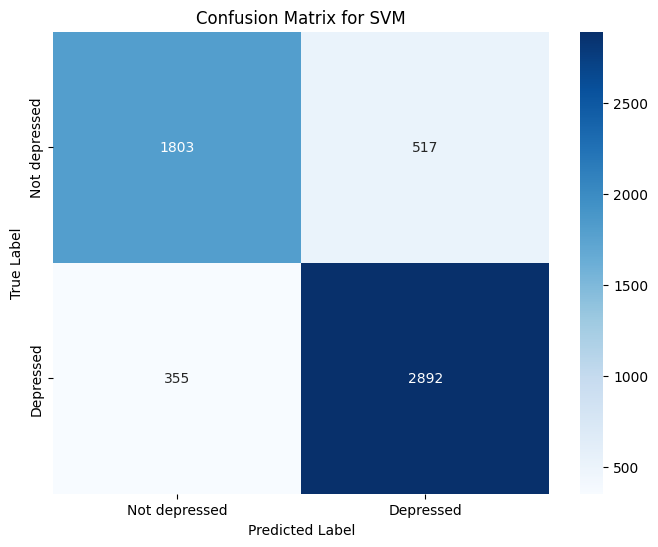

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not depressed", "Depressed"],
            yticklabels=["Not depressed", "Depressed"])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance

In [11]:
feature_importance = np.abs(best_model.coef_[0])
for f, i in sorted(zip(X_train.columns, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"Feature {f}: {i}")

Feature Have you ever had suicidal thoughts ?: 1.7818534178331902
Feature Academic Pressure: 0.5701164762576809
Feature Financial Stress: 0.38143862097058445
Feature Dietary Habits: 0.3612451675526245
Feature Family History of Mental Illness: 0.17945931451504293
Feature Study Satisfaction: 0.16784875115263276
Feature Work/Study Hours: 0.08190763041784521
Feature Sleep Duration: 0.08118672154523665
Feature Age: 0.0808151249657385
Feature CGPA: 0.03565056322258897
Feature Gender: 0.021779712792522332
Feature Degree: 0.004695630690548569
Feature City: 0.0006547568482346833
